### House price prediction using the Simple linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [2]:
data = pd.read_csv('C:\\Users\\Olivia\\Desktop\\Human_Detector\\ParisHousing.csv')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
print(data.info())
print()
print(data.shape)
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


# EDA

In [5]:
data.isnull().any()

squareMeters         False
numberOfRooms        False
hasYard              False
hasPool              False
floors               False
cityCode             False
cityPartRange        False
numPrevOwners        False
made                 False
isNewBuilt           False
hasStormProtector    False
basement             False
attic                False
garage               False
hasStorageRoom       False
hasGuestRoom         False
price                False
dtype: bool

<AxesSubplot:>

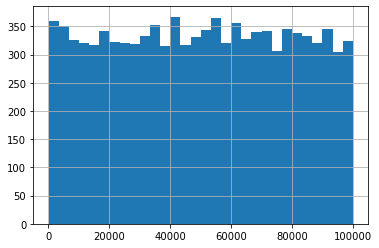

In [6]:
data['squareMeters'].hist(bins= 30)

In [7]:
data.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


### The SquareMeters has a strong correlation with the price 
### Performing a simpleLinearRegression using the SquareMeters as my input variable
### and the price as my target variable



In [8]:
#Linear Regression requires model to be in 2D, hence we have to reshape the variables
x= data['squareMeters'].values.reshape(-1,1)
y= data['price']


In [9]:
print(y)
print()
print(x)

0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64

[[75523]
 [80771]
 [55712]
 ...
 [83841]
 [59036]
 [ 1440]]


### Splitting the input and target variable into train and testing 

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [12]:
print(x_train.shape)
print()
print(y_train.shape)
print()
print(x_test.shape)
print()
print(y_test.shape)

(8000, 1)

(8000,)

(2000, 1)

(2000,)


### Training the Model 

In [13]:
model = LinearRegression()

In [24]:
model.fit(x_train, y_train)

LinearRegression()

In [26]:
#Making predictions
y_pred = model.predict(x_test)

In [27]:
y_pred

array([3282286.99703674, 7708247.48050964, 9379832.55601197, ...,
       9877428.11330436, 3333186.54258775, 4202978.7767777 ])

In [25]:
#Changing the display format of the floating point values 
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [41]:
#Comparing the actual house price to the predicted price value
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [42]:
print(df_pred)

         Actual  Predicted
7878 3282188.10 3282287.00
3224 7704215.50 7708247.48
1919 9385146.90 9379832.56
4432 4883097.10 4883172.70
4835 3281975.40 3286986.96
...         ...        ...
9073 5314198.60 5316868.83
8584 8274315.00 8271542.45
5390 9877813.40 9877428.11
5092 3329395.80 3333186.54
2964 4204881.00 4202978.78

[2000 rows x 2 columns]


### Model Evaluation 

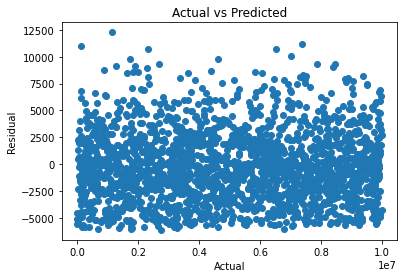

7878     -98.90
3224   -4031.98
1919    5314.34
4432     -75.60
4835   -5011.56
         ...   
9073   -2670.23
8584    2772.55
5390     385.29
5092   -3790.74
2964    1902.22
Name: price, Length: 2000, dtype: float64


In [43]:
# Using scatter plot
residual = y_test - y_pred
plt.scatter(y_test, residual)
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.title('Actual vs Predicted')
plt.show()

print(residual)


In [53]:
# Using Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'The mean absolute error is {mae}')


The mean absolute error is 2611.040102231794


In [47]:
y_mean = y_test.mean()

In [48]:
print(y_mean)

4989854.234050015


In [54]:
#Using mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"The mean squared error: {mse}")

The mean squared error: 10618584.131129956


In [57]:
#Using the root mean squared error
import numpy as np

rmse = np.sqrt(mse)
print(f"The root mean squared errror: {rmse}")

The root mean squared errror: 3258.616904628397
